In [ ]:
import pandas as pd
file_path = "FRU_final.csv"
df = pd.read_csv(file_path)
df.head()


,college id,total bc,total bo,fru,student count
0,IR-E-C-1297,103308424,1310912315,9.49,1332
1,IR-E-U-0701,874924788,5480448841,18.06,2118
2,IR-E-U-0490,885220050,12543002567,9.49,9183
3,IR-E-U-0575,443609380,3514077871,14.60,1697
4,IR-E-U-0473,2105546455,8450928500,13.16,5902


In [ ]:
# Computing BC and BO for 3 years of student count
df["BC"] = df["total bc"] / (df["student count"] * 3)
df["BO"] = df["total bo"] / (df["student count"] * 3)

df[["college id", "BC", "BO"]].head()

,college id,BC,BO
0,IR-E-C-1297,25852.958959,328056.134885
1,IR-E-U-0701,137696.693107,862519.490242
2,IR-E-U-0490,32132.565610,455297.926132
3,IR-E-U-0575,87136.000786,690252.970143
4,IR-E-U-0473,118917.115949,477291.793742


In [ ]:
#computing BC 25%
df["FRU_BC"] = (df["fru"] * 0.25)
#computing BO 75%
df["FRU_BO"] = (df["fru"] * 0.75)

df[["college id", "BC", "FRU_BC", "BO", "FRU_BO"]].head()


,college id,BC,FRU_BC,BO,FRU_BO
0,IR-E-C-1297,25852.958959,2.3725,328056.134885,7.1175
1,IR-E-U-0701,137696.693107,4.5150,862519.490242,13.5450
2,IR-E-U-0490,32132.565610,2.3725,455297.926132,7.1175
3,IR-E-U-0575,87136.000786,3.6500,690252.970143,10.9500
4,IR-E-U-0473,118917.115949,3.2900,477291.793742,9.8700


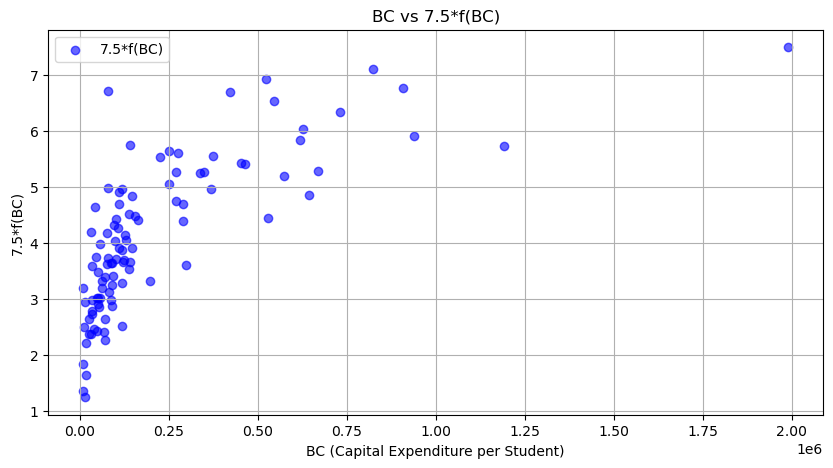

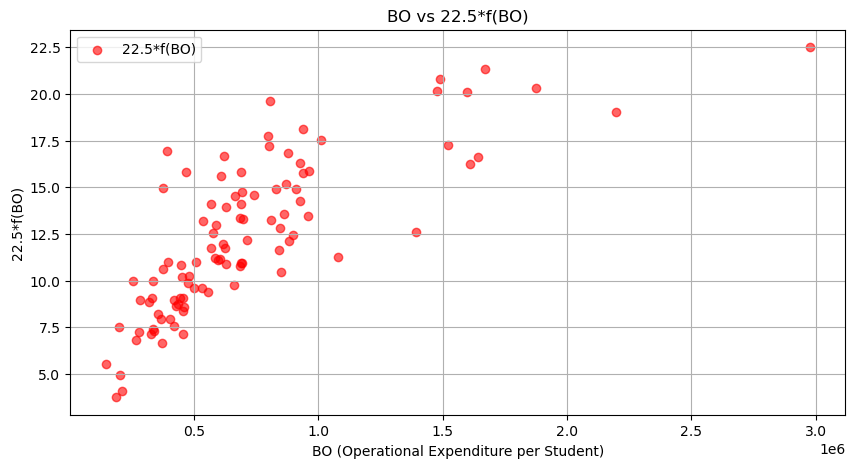

In [ ]:
import matplotlib.pyplot as plt

# Plotting BC vs f(BC)
plt.figure(figsize=(10, 5))
plt.scatter(df["BC"], df["FRU_BC"], color='blue', alpha=0.6, label="7.5*f(BC)")
plt.xlabel("BC (Capital Expenditure per Student)")
plt.ylabel("7.5*f(BC)")
plt.title("BC vs 7.5*f(BC)")
plt.legend()
plt.grid()
plt.show()

# Plotting BO vs f(BO)
plt.figure(figsize=(10, 5))
plt.scatter(df["BO"], df["FRU_BO"], color='red', alpha=0.6, label="22.5*f(BO)")
plt.xlabel("BO (Operational Expenditure per Student)")
plt.ylabel("22.5*f(BO)")
plt.title("BO vs 22.5*f(BO)")
plt.legend()
plt.grid()
plt.show()


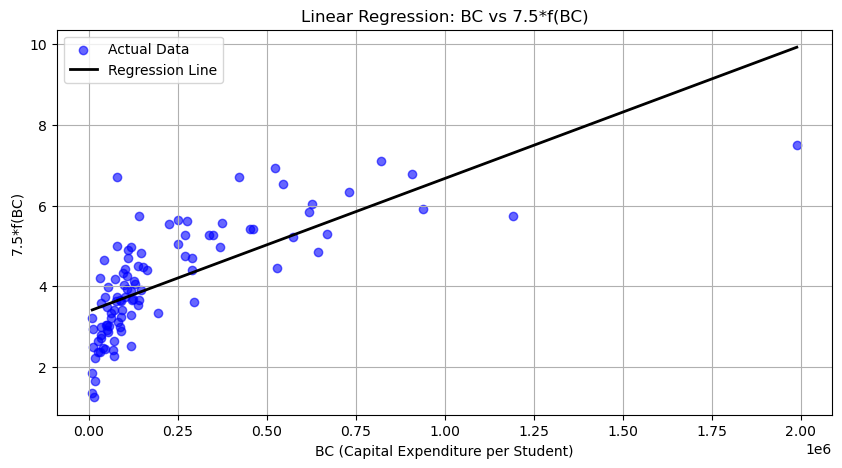

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
# preparing data for BC
X_BC = df["BC"].values.reshape(-1, 1)
y_BC = df["FRU_BC"].values

# applying linear regression
model_BC = LinearRegression()
model_BC.fit(X_BC, y_BC)

X_BC_range = np.linspace(X_BC.min(), X_BC.max(), 100).reshape(-1, 1)
y_BC_pred = model_BC.predict(X_BC_range)

plt.figure(figsize=(10, 5))
plt.scatter(df["BC"], df["FRU_BC"], color='blue', alpha=0.6, label="Actual Data")
plt.plot(X_BC_range, y_BC_pred, color='black', linewidth=2, label="Regression Line")
plt.xlabel("BC (Capital Expenditure per Student)")
plt.ylabel("7.5*f(BC)")
plt.title("Linear Regression: BC vs 7.5*f(BC)")
plt.legend()
plt.grid()
plt.show()


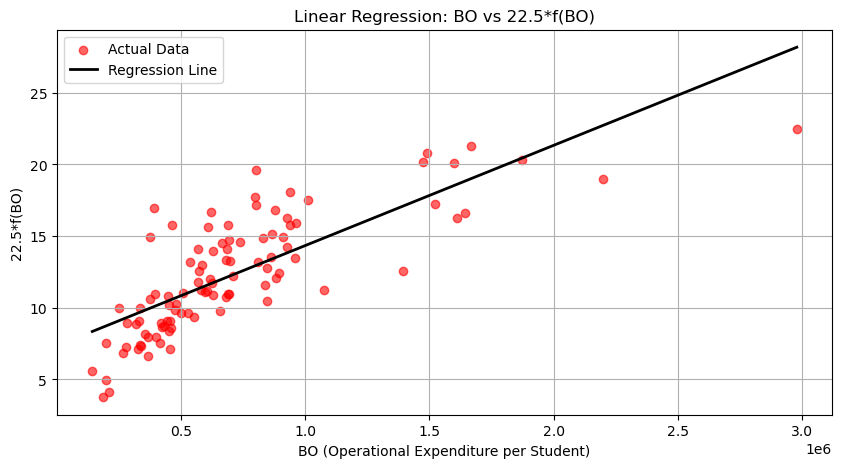

In [ ]:
# Prepareing data for BO
X_BO = df["BO"].values.reshape(-1, 1)
y_BO = df["FRU_BO"].values

# applying linear regression
model_BO = LinearRegression()
model_BO.fit(X_BO, y_BO)


X_BO_range = np.linspace(X_BO.min(), X_BO.max(), 100).reshape(-1, 1)
y_BO_pred = model_BO.predict(X_BO_range)

plt.figure(figsize=(10, 5))
plt.scatter(df["BO"], df["FRU_BO"], color='red', alpha=0.6, label="Actual Data")
plt.plot(X_BO_range, y_BO_pred, color='black', linewidth=2, label="Regression Line")
plt.xlabel("BO (Operational Expenditure per Student)")
plt.ylabel("22.5*f(BO)")
plt.title("Linear Regression: BO vs 22.5*f(BO)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


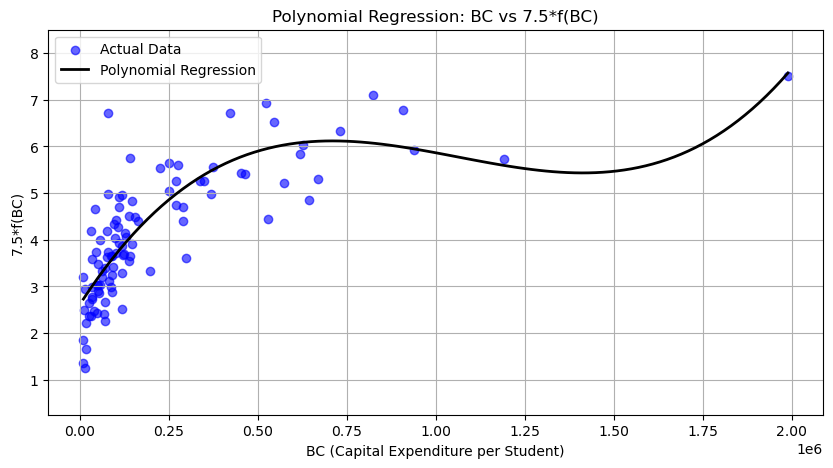

In [ ]:
X_BC = df["BC"].values.reshape(-1, 1)
y_BC = df["FRU_BC"].values

# Creating polynomial regression of degree 2
poly_BC = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_BC.fit(X_BC, y_BC)
X_BC_range = np.linspace(X_BC.min(), X_BC.max(), 100).reshape(-1, 1)
y_BC_pred = poly_BC.predict(X_BC_range)

plt.figure(figsize=(10, 5))
plt.scatter(df["BC"], df["FRU_BC"], color='blue', alpha=0.6, label="Actual Data")
plt.plot(X_BC_range, y_BC_pred, color='black', linewidth=2, label="Polynomial Regression")
plt.ylim(df["FRU_BC"].min() - 1, df["FRU_BC"].max() + 1)
plt.xlabel("BC (Capital Expenditure per Student)")
plt.ylabel("7.5*f(BC)")
plt.title("Polynomial Regression: BC vs 7.5*f(BC)")
plt.legend()
plt.grid()
plt.show()


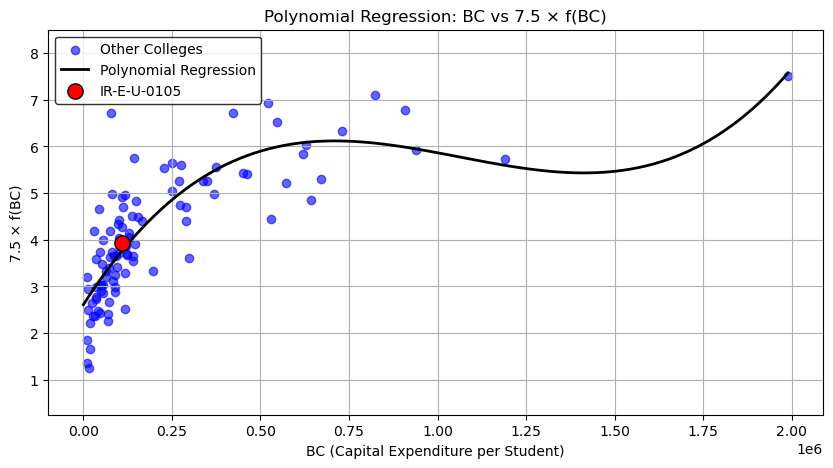

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X_BC = df["BC"].values.reshape(-1, 1)
y_BC = df["FRU_BC"].values

# Creating polynomial regression of degree 3
poly_BC = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_BC.fit(X_BC, y_BC)

X_BC_range = np.linspace(0, X_BC.max(), 100).reshape(-1, 1)
y_BC_pred = poly_BC.predict(X_BC_range)

# For IIITD highlight
highlight_college = "IR-E-U-0105"
highlight_row = df[df["college id"] == highlight_college]

plt.figure(figsize=(10, 5))
plt.scatter(df["BC"], df["FRU_BC"], color='blue', alpha=0.6, label="Other Colleges")
plt.plot(X_BC_range, y_BC_pred, color='black', linewidth=2, label="Polynomial Regression")

if not highlight_row.empty:
    plt.scatter(highlight_row["BC"], highlight_row["FRU_BC"],
                color='red', edgecolors='black', s=120, label="IR-E-U-0105", zorder=3)

plt.ylim(min(y_BC) - 1, max(y_BC) + 1)
plt.xlabel("BC (Capital Expenditure per Student)")
plt.ylabel("7.5 × f(BC)")
plt.title("Polynomial Regression: BC vs 7.5 × f(BC)")
plt.legend(loc="upper left", fontsize=10, frameon=True, edgecolor="black")
plt.grid()
plt.show()


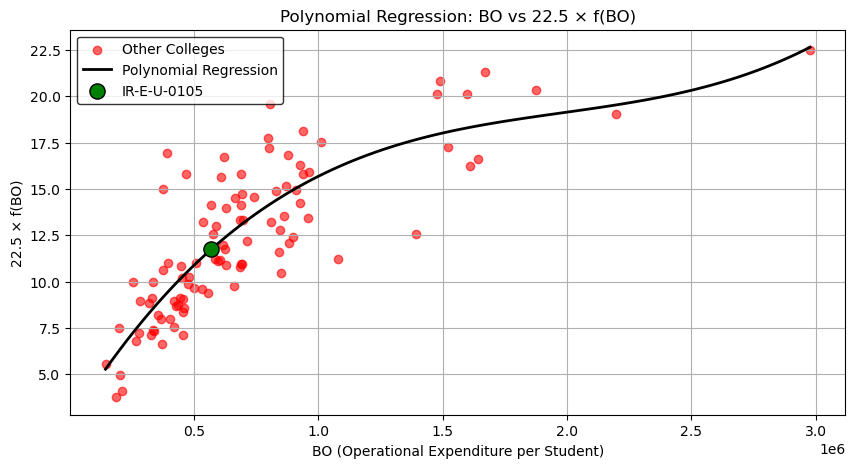

In [ ]:
X_BO = df["BO"].values.reshape(-1, 1)
y_BO = df["FRU_BO"].values

# Creating polynomial regression of degree 3
poly_BO = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_BO.fit(X_BO, y_BO)
X_BO_range = np.linspace(X_BO.min(), X_BO.max(), 100).reshape(-1, 1)
y_BO_pred = poly_BO.predict(X_BO_range)

#For IIITD highlight
highlight_college = "IR-E-U-0105"
highlight_row = df[df["college id"] == highlight_college]

plt.figure(figsize=(10, 5))
plt.scatter(df["BO"], df["FRU_BO"], color='red', alpha=0.6, label="Actual Data")
plt.plot(X_BO_original, y_pred_BO, color='black', linewidth=2, label="Polynomial Regression")

if not highlight_row.empty:
    plt.scatter(highlight_row["BO"], highlight_row["FRU_BO"],
                color='blue', edgecolors='black', s=120, label="Highlighted College", zorder=3)


    plt.annotate(highlight_college,
                 (highlight_row["BO"].values[0], highlight_row["FRU_BO"].values[0]),
                 textcoords="offset points", xytext=(10, 10), ha='center', fontsize=12, color='blue')

plt.xlabel("BO (Operational Expenditure per Student)")
plt.ylabel("22.5 × f(BO)")
plt.title("Polynomial Regression: BO vs 22.5 × f(BO) (Highlighting IR-E-U-0105)")
plt.legend()
plt.grid()
plt.show()



In [ ]:
 #Function for predicting FRU
def predict_FRU(BC_input, BO_input):

    pred_FRU_BC = poly_BC.predict(np.array([[BC_input]]))[0]
    pred_FRU_BO = poly_BO.predict(np.array([[BO_input]]))[0]


    FRU = pred_FRU_BC + pred_FRU_BO

    return {
        "7.5 * f(BC)": pred_FRU_BC,
        "22.5 * f(BO)": pred_FRU_BO,
        "FRU": FRU
    }

BC_test = 137696.693107
BO_test = 862519.490242

result = predict_FRU(BC_test, BO_test)
print(result)

{'7.5 * f(BC)': 4.016845865598254, '22.5 * f(BO)': 14.658732555072643, 'FRU': 18.675578420670895}


In [ ]:
df[["college id", "BC", "FRU_BC", "BO", "FRU_BO"]].head()

,college id,BC,FRU_BC,BO,FRU_BO
0,IR-E-C-1297,25852.958959,2.3725,328056.134885,7.1175
1,IR-E-U-0701,137696.693107,4.5150,862519.490242,13.5450
2,IR-E-U-0490,32132.565610,2.3725,455297.926132,7.1175
3,IR-E-U-0575,87136.000786,3.6500,690252.970143,10.9500
4,IR-E-U-0473,118917.115949,3.2900,477291.793742,9.8700


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

y_BC_pred_actual = poly_BC.predict(X_BC)  # Predicted values for BC
y_BO_pred_actual = poly_BO.predict(X_BO)  # Predicted values for BO

# R square Score
r2_BC = r2_score(y_BC, y_BC_pred_actual)
r2_BO = r2_score(y_BO, y_BO_pred_actual)

# MAE
mae_BC = mean_absolute_error(y_BC, y_BC_pred_actual)
mae_BO = mean_absolute_error(y_BO, y_BO_pred_actual)

print(f"Accuracy for 7.5 * f(BC): R² = {r2_BC:.4f}, MAE = {mae_BC:.4f}")
print(f"Accuracy for 22.5 * f(BO): R² = {r2_BO:.4f}, MAE = {mae_BO:.4f}")


Accuracy for 7.5 * f(BC): R² = 0.6787, MAE = 0.5765
Accuracy for 22.5 * f(BO): R² = 0.7000, MAE = 1.7501


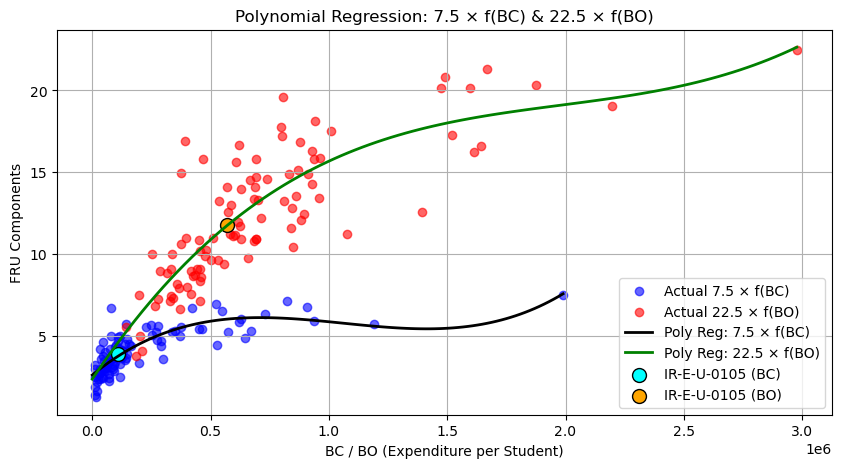

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Highlight IIITD
highlight_college = df[df["college id"] == "IR-E-U-0105"]

# predictions for BC
X_BC_range = np.linspace(0, df["BC"].max(), 100).reshape(-1, 1)
y_BC_pred = poly_BC.predict(X_BC_range)

# predictions for BO
X_BO_range = np.linspace(0, df["BO"].max(), 100).reshape(-1, 1)
y_BO_pred = poly_BO.predict(X_BO_range)

plt.figure(figsize=(10, 5))
plt.scatter(df["BC"], df["FRU_BC"], color='blue', alpha=0.6, label="Actual 7.5 × f(BC)")
plt.scatter(df["BO"], df["FRU_BO"], color='red', alpha=0.6, label="Actual 22.5 × f(BO)")
plt.plot(X_BC_range, y_BC_pred, color='black', linewidth=2, label="Poly Reg: 7.5 × f(BC)")
plt.plot(X_BO_range, y_BO_pred, color='green', linewidth=2, label="Poly Reg: 22.5 × f(BO)")
plt.scatter(highlight_college["BC"], highlight_college["FRU_BC"], color='cyan', edgecolors='black', s=100, label="IR-E-U-0105 (BC)")
plt.scatter(highlight_college["BO"], highlight_college["FRU_BO"], color='orange', edgecolors='black', s=100, label="IR-E-U-0105 (BO)")
plt.xlabel("BC / BO (Expenditure per Student)")
plt.ylabel("FRU Components")
plt.title("Polynomial Regression: 7.5 × f(BC) & 22.5 × f(BO)")
plt.legend()
plt.grid()
plt.show()


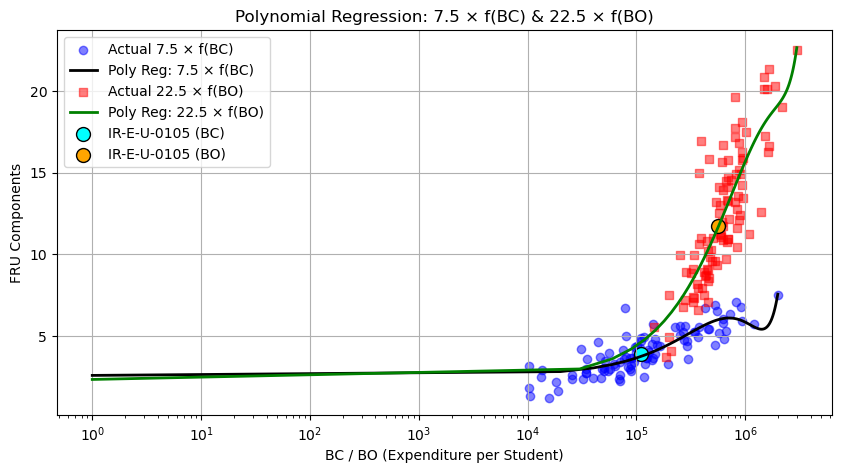

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# highlight IIITD
highlight_college = df[df["college id"] == "IR-E-U-0105"]

# predictions for BC and BO
X_BC_range = np.linspace(1, df["BC"].max(), 100).reshape(-1, 1)
y_BC_pred = poly_BC.predict(X_BC_range)

X_BO_range = np.linspace(1, df["BO"].max(), 100).reshape(-1, 1)
y_BO_pred = poly_BO.predict(X_BO_range)


plt.figure(figsize=(10, 5))
plt.scatter(df["BC"], df["FRU_BC"], color='blue', alpha=0.5, label="Actual 7.5 × f(BC)", marker='o')
plt.plot(X_BC_range, y_BC_pred, color='black', linewidth=2, label="Poly Reg: 7.5 × f(BC)")
plt.scatter(df["BO"], df["FRU_BO"], color='red', alpha=0.5, label="Actual 22.5 × f(BO)", marker='s')
plt.plot(X_BO_range, y_BO_pred, color='green', linewidth=2, label="Poly Reg: 22.5 × f(BO)")
plt.scatter(highlight_college["BC"], highlight_college["FRU_BC"], color='cyan', edgecolors='black', s=100, label="IR-E-U-0105 (BC)")
plt.scatter(highlight_college["BO"], highlight_college["FRU_BO"], color='orange', edgecolors='black', s=100, label="IR-E-U-0105 (BO)")
plt.xscale("log")
plt.xlabel("BC / BO (Expenditure per Student)")
plt.ylabel("FRU Components")
plt.title("Polynomial Regression: 7.5 × f(BC) & 22.5 × f(BO)")
plt.legend()
plt.grid()
plt.show()


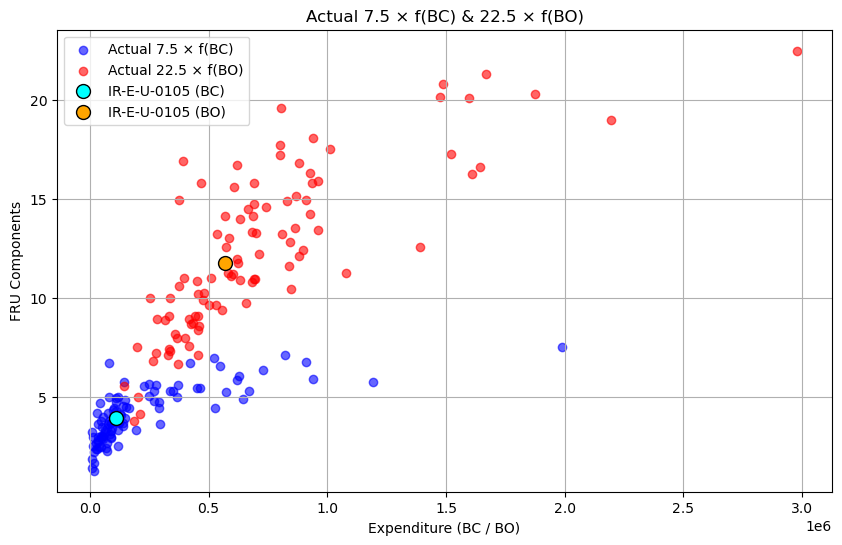

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df["BC"], df["FRU_BC"], color='blue', alpha=0.6, label="Actual 7.5 × f(BC)")
plt.scatter(df["BO"], df["FRU_BO"], color='red', alpha=0.6, label="Actual 22.5 × f(BO)")

# Highlight IIITD
highlight = df[df["college id"] == "IR-E-U-0105"]
plt.scatter(highlight["BC"], highlight["FRU_BC"], color='cyan', edgecolors='black', s=100, label="IR-E-U-0105 (BC)")
plt.scatter(highlight["BO"], highlight["FRU_BO"], color='orange', edgecolors='black', s=100, label="IR-E-U-0105 (BO)")
plt.xlabel("Expenditure (BC / BO)")
plt.ylabel("FRU Components")
plt.title("Actual 7.5 × f(BC) & 22.5 × f(BO)")
plt.legend()
plt.grid()
plt.show()
